
# 1. Setup



In [76]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True

# Using the URL for the file
spotify_original = pd.read_csv("dataset.csv")

spotify_original_reshape = spotify_original.iloc[:,1:]

# 2. Data Cleaning

In [77]:
# Cleaning rows with missing information
missing_data_rows = spotify_original_reshape[spotify_original_reshape.isnull().any(axis=1)]

missing_data_rows

spotify_original_reshape_drop = spotify_original_reshape.dropna()

print(spotify_original_reshape.shape)
print(spotify_original_reshape_drop.shape)

(114000, 20)
(113999, 20)


In [78]:
#clean track_name and artists columns by stripping spaces and converting to lowercase
spotify_original_reshape_drop['track_name_clean'] = spotify_original_reshape_drop['track_name'].str.strip().str.lower()
spotify_original_reshape_drop['artists_clean'] = spotify_original_reshape_drop['artists'].str.strip().str.lower()

#priority list for genres to handle duplicates
genre_priority = ['pop', 'rock', 'hip hop', 'rap', 'reggaeton', 'latin', 'electronic', 'r&b', 'reggae', 'dance', 'classical']
spotify_original_reshape_drop['genre_priority'] = spotify_original_reshape_drop['track_genre'].apply(lambda x: genre_priority.index(x) if x in genre_priority else len(genre_priority))

#sort the dataset by track_name, artists, genre priority, popularity, and duration
spotify_data_sorted = spotify_original_reshape_drop.sort_values(by=['track_name_clean', 'artists_clean', 'genre_priority', 'popularity', 'duration_ms'],
                                                                ascending=[True, True, True, True, False])

#remove duplicates
spotify_cleaned = spotify_data_sorted.drop_duplicates(subset=['track_name_clean', 'artists_clean'], keep='first')

# checking size
print(f"Shape of the dataset before cleaning: {spotify_original_reshape_drop.shape}")
print(f"Shape of the dataset after cleaning: {spotify_cleaned.shape}")

# removing extra columns added
spotify_cleaned_final = spotify_cleaned.drop(columns=['track_name_clean', 'artists_clean', 'genre_priority'])

# Fcheck size again
print(f"Shape of the dataset after removing extra columns: {spotify_cleaned_final.shape}")


spotify_cleaned_final

Shape of the dataset before cleaning: (113999, 23)
Shape of the dataset after cleaning: (81206, 23)
Shape of the dataset after removing extra columns: (81206, 20)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
36750,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,52,178533,True,0.823,0.6120,1,-7.767,1,0.2480,0.1680,0.000000,0.1090,0.6880,142.959,4,french
92751,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",39,151680,False,0.615,0.3750,0,-10.362,0,0.0319,0.4820,0.000000,0.1110,0.9220,110.720,4,rockabilly
66996,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",8,86675,False,0.664,0.6110,3,-8.687,1,0.0886,0.1200,0.000000,0.0408,0.7580,118.443,4,kids
101161,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",0,289133,False,0.111,0.0568,10,-28.053,1,0.0551,0.9900,0.697000,0.1100,0.0395,169.401,1,sleep
82584,5Zx0Rrkn5RFBMD2PRxX3mI,Dillinger Four,C I V I L W A R,"""Contemplate This on the Tree of Woe.""",24,180706,False,0.565,0.9770,11,-3.592,1,0.0546,0.0282,0.001320,0.4330,0.3870,106.478,4,power-pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65756,2oVHb8wyg6oC2iNpGBNvx1,HEIZE,Hotel del Luna (Original Television Soundtrack...,내 맘을 볼 수 있나요,63,225785,False,0.397,0.1660,9,-10.678,1,0.0349,0.8840,0.000000,0.1000,0.1310,134.708,4,k-pop
65859,4kIpBfvK44bxqX7zo8K1oP,Gaho,ITAEWON CLASS (Original Television Soundtrack)...,시작,65,202440,False,0.591,0.8180,4,-3.532,1,0.0730,0.1720,0.000000,0.1260,0.5740,108.107,4,k-pop
75903,4mHc7LUlO3k6AXeFV2EiJK,Yiruma,Yiruma Official Album 'Piano Therapy' (The Ori...,약속 (Piano Solo),37,144533,False,0.504,0.1430,1,-18.713,1,0.0701,0.9800,0.922000,0.1240,0.0584,148.786,4,new-age
79554,0tQesiSZJQOdHeAC7r59us,GODA,One Punch Man (Original Soundtrack),원펀맨 Theme - Sad Theme,37,228000,False,0.542,0.3370,2,-16.088,1,0.0539,0.9850,0.933000,0.1470,0.4430,159.951,4,piano


In [79]:
"""
Merge Genres
"""


genre_mapping = {
    # Pop
    'pop': 'Pop', 'power-pop': 'Pop', 'synth-pop': 'Pop', 'indie-pop': 'Pop',
    'k-pop': 'Pop', 'j-pop': 'Pop', 'cantopop': 'Pop', 'mandopop': 'Pop',
    'british': 'Pop', 'spanish': 'Pop', 'latino': 'Pop', 'pop-film': 'Pop',
    'pagode': 'Pop', 'j-idol': 'Pop', 'sad': 'Pop',
    
    # Rock
    'rock': 'Rock', 'rock-n-roll': 'Rock', 'alt-rock': 'Rock', 'indie': 'Rock',
    'hard-rock': 'Rock', 'punk-rock': 'Rock', 'garage': 'Rock', 'psych-rock': 'Rock',
    'grunge': 'Rock', 'guitar': 'Rock', 'ska': 'Rock', 'emo': 'Rock', 'punk': 'Rock',
    'death-metal': 'Rock', 'hardcore': 'Rock', 'metal': 'Rock', 'heavy-metal': 'Rock',
    'black-metal': 'Rock', 'metalcore': 'Rock', 'j-rock': 'Electronic/Dance', 'rockabilly': 'Rock',
    'alternative': 'Rock',
    
    # Electronic/Dance
    'electronic': 'Electronic/Dance', 'edm': 'Electronic/Dance', 'house': 'Electronic/Dance',
    'deep-house': 'Electronic/Dance', 'progressive-house': 'Electronic/Dance',
    'techno': 'Electronic/Dance', 'minimal-techno': 'Electronic/Dance',
    'detroit-techno': 'Electronic/Dance', 'trance': 'Electronic/Dance',
    'dubstep': 'Electronic/Dance', 'drum-and-bass': 'Electronic/Dance',
    'breakbeat': 'Electronic/Dance', 'club': 'Electronic/Dance',
    'dancehall': 'Electronic/Dance', 'j-dance': 'Electronic/Dance', 'disco': 'Electronic/Dance',
    'hardstyle': 'Electronic/Dance', 'chill': 'Electronic/Dance',
    'electro': 'Electronic/Dance', 'dance': 'Electronic/Dance',
    
    # Hip-Hop/R&B
    'hip-hop': 'Hip-Hop/R&B', 'r-n-b': 'Hip-Hop/R&B', 'funk': 'Hip-Hop/R&B',
    'afrobeat': 'Hip-Hop/R&B', 'reggaeton': 'Hip-Hop/R&B', 'dub': 'Hip-Hop/R&B',
    'groove': 'Hip-Hop/R&B', 'reggae': 'Hip-Hop/R&B',
    
    # Jazz/Blues
    'jazz': 'Jazz/Blues', 'blues': 'Jazz/Blues', 'bluegrass': 'Jazz/Blues',
    'gospel': 'Jazz/Blues', 'soul': 'Jazz/Blues',
    
    # Classical/Instrumental
    'classical': 'Classical/Instrumental', 'piano': 'Classical/Instrumental',
    'opera': 'Classical/Instrumental', 'ambient': 'Classical/Instrumental',
    'idm': 'Classical/Instrumental', 'trip-hop': 'Classical/Instrumental',
    'new-age': 'Classical/Instrumental', 'singer-songwriter': 'Classical/Instrumental',
    'study': 'Classical/Instrumental',
    
    # Folk/World
    'folk': 'Folk/World', 'acoustic': 'Folk/World', 'country': 'Folk/World',
    'honky-tonk': 'Folk/World', 'turkish': 'Folk/World', 'brazil': 'Folk/World',
    'samba': 'Folk/World', 'forro': 'Folk/World', 'indian': 'Folk/World',
    'iranian': 'Folk/World', 'malay': 'Folk/World', 'afrobeat': 'Folk/World',
    'world-music': 'Folk/World',
    
    # Latin
    'latin': 'Latin', 'salsa': 'Latin', 'tango': 'Latin', 'pagode': 'Latin',
    'mpb': 'Latin', 'sertanejo': 'Latin', 'brazil': 'Latin',
    
    # Children's/Family
    'kids': 'Children\'s/Family', 'children': 'Children\'s/Family', 'disney': 'Children\'s/Family',
    'show-tunes': 'Children\'s/Family', 'romance': 'Children\'s/Family', 'happy': 'Children\'s/Family',
    
    # Experimental/Alternative
    'industrial': 'Experimental/Alternative', 'grindcore': 'Experimental/Alternative',
    'goth': 'Experimental/Alternative', 'detroit-techno': 'Experimental/Alternative',
    'idm': 'Experimental/Alternative',
    
    # Other/Functional
    'anime': 'Other/Functional', 'study': 'Other/Functional', 'party': 'Other/Functional',
    'sleep': 'Other/Functional', 'comedy': 'Other/Functional', 'french': 'Other/Functional',
    'german': 'Other/Functional', 'swedish': 'Other/Functional', 'chicago-house': 'Other/Functional'
}

# Apply mapping
spotify_cleaned_final['merged_genre'] = spotify_cleaned_final['track_genre'].map(genre_mapping)

# drop track_genre column
spotify_cleaned_final = spotify_cleaned_final.drop(columns=['track_genre'])

# Add one-hot encoding for merged_genre
spotify_cleaned_final = pd.get_dummies(spotify_cleaned_final, columns=['merged_genre'])
print(spotify_cleaned_final.columns)

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'merged_genre_Children's/Family',
       'merged_genre_Classical/Instrumental', 'merged_genre_Electronic/Dance',
       'merged_genre_Experimental/Alternative', 'merged_genre_Folk/World',
       'merged_genre_Hip-Hop/R&B', 'merged_genre_Jazz/Blues',
       'merged_genre_Latin', 'merged_genre_Other/Functional',
       'merged_genre_Pop', 'merged_genre_Rock'],
      dtype='object')


# 3. Decision Tree


In [80]:
"""
Train a model to predict the popularity of a song based on its audio features.
"""


import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import sklearn.metrics as metrics

spotify_processed = spotify_cleaned_final

# Process popularity > 30 as popular, otherwise unpopular
spotify_processed['popularity'] = spotify_processed['popularity'].apply(lambda x: 1 if x > 35 else 0)
print(spotify_processed['popularity'].value_counts())

Y = spotify_processed['popularity']
# X = spotify_processed[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
#                        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
#                        'time_signature', 'merged_genre_Classical/Instrumental', 
#                        'merged_genre_Electronic/Dance', 'merged_genre_Folk/World', 'merged_genre_Hip-Hop/R&B', 
#                        'merged_genre_Jazz/Blues', 'merged_genre_Latin', 'merged_genre_Other/Functional', 
#                        'merged_genre_Pop', 'merged_genre_Rock']]
X = spotify_processed[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                       'time_signature']]

numerical_features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
category_features = ['mode', 'merged_genre_Classical/Instrumental', 'merged_genre_Electronic/Dance', 'merged_genre_Folk/World', 'merged_genre_Hip-Hop/R&B', 'merged_genre_Jazz/Blues', 'merged_genre_Latin', 'merged_genre_Other/Functional', 'merged_genre_Pop', 'merged_genre_Rock']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Don't Standardize because it does not affect the performance of Decision Trees
# scaler = StandardScaler()
# X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
# X_test[numerical_features] = scaler.transform(X_test[numerical_features])

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)


popularity
0    42074
1    39132
Name: count, dtype: int64


DecisionTreeClassifier(random_state=42)

In [81]:
"""
Evaluate the model, compare train vs validation performance
"""

# Evaluate the model on the Train set
print("Train set:") 
train_predictions = model.predict(X_train)
train_accuracy = metrics.accuracy_score(Y_train, train_predictions)
print(f"Accuracy: {train_accuracy}")
confusion_matrix = metrics.confusion_matrix(Y_train, train_predictions)
print(f"Confusion matrix:\n{confusion_matrix}")
precision = metrics.precision_score(Y_train, train_predictions)
print(f"Precision: {precision}")
recall = metrics.recall_score(Y_train, train_predictions)
print(f"Recall: {recall}")
f1 = metrics.f1_score(Y_train, train_predictions)
print(f"F1 Score: {f1}")

# Evaluate the model on the Test set
print("\nTest set:")
test_predictions = model.predict(X_test)
test_accuracy = metrics.accuracy_score(Y_test, test_predictions)
print(f"Accuracy: {test_accuracy}")
confusion_matrix = metrics.confusion_matrix(Y_test, test_predictions)
print(f"Confusion matrix:\n{confusion_matrix}")
precision = metrics.precision_score(Y_test, test_predictions)
print(f"Precision: {precision}")
recall = metrics.recall_score(Y_test, test_predictions)
print(f"Recall: {recall}")
f1 = metrics.f1_score(Y_test, test_predictions)
print(f"F1 Score: {f1}")



Train set:
Accuracy: 0.9987377624530509
Confusion matrix:
[[33580     0]
 [   82 31302]]
Precision: 1.0
Recall: 0.9973872036706602
F1 Score: 0.9986918929266503

Test set:
Accuracy: 0.577515084349218
Confusion matrix:
[[5026 3468]
 [3394 4354]]
Precision: 0.5566351316798772
Recall: 0.5619514713474445
F1 Score: 0.5592806679511881


# 4. Random Forest
- Consider that the training set and validation set performance is too different, we need to use random forest to mitigate this

In [72]:
"""
Create Random Forest Model
"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV



rf_model = RandomForestClassifier(random_state=8743)
rf_model.fit(X_train, Y_train)

tree_depths = [estimator.tree_.max_depth for estimator in rf_model.estimators_]
print(f"Average Tree Depth: {np.mean(tree_depths)}")

Average Tree Depth: 44.52


In [73]:
"""
Evaluate the Random Forest Model on the Train set
"""

# Evaluate the model on the Train set
print("##### Train set: #####")
train_predictions = rf_model.predict(X_train)
train_accuracy = metrics.accuracy_score(Y_train, train_predictions)
print(f"Accuracy: {train_accuracy}")
train_conf_matrix = metrics.confusion_matrix(Y_train, train_predictions)
print(f"Confusion matrix:\n{train_conf_matrix}")
precision = metrics.precision_score(Y_train, train_predictions)
print(f"Precision: {precision}")
recall = metrics.recall_score(Y_train, train_predictions)
print(f"Recall: {recall}")
f1 = metrics.f1_score(Y_train, train_predictions)
print(f"F1 Score: {f1}")


##### Train set: #####
Accuracy: 0.9987377624530509
Confusion matrix:
[[33530    50]
 [   32 31352]]
Precision: 0.998407744729635
Recall: 0.9989803721641601
F1 Score: 0.9986939763641576


Try Cross-Validation to compare RF performance against training set

In [74]:
"""
Cross-Validation
"""

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

# Cross-validation loop
for train_index, test_index in skf.split(X, Y):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # Train the model
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_model.predict(X_test)
    
    # Calculate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    conf_matrices.append(confusion_matrix(y_test, y_pred))

# Convert results to numpy arrays for easy calculation of averages
accuracies = np.array(accuracies)
precisions = np.array(precisions)
recalls = np.array(recalls)
f1_scores = np.array(f1_scores)

print("\n##### Cross-validation results: #####")
print(f"Accuracy: Mean={accuracies.mean():.4f}, Std={accuracies.std():.4f}")
print(f"Precision: Mean={precisions.mean():.4f}, Std={precisions.std():.4f}")
print(f"Recall: Mean={recalls.mean():.4f}, Std={recalls.std():.4f}")
print(f"F1 Score: Mean={f1_scores.mean():.4f}, Std={f1_scores.std():.4f}")

# Example: Print confusion matrices for each fold
for i, conf_matrix in enumerate(conf_matrices):
    print(f"Confusion Matrix for Fold {i+1}:\n{conf_matrix}\n")


##### Cross-validation results: #####
Accuracy: Mean=0.6512, Std=0.0022
Precision: Mean=0.6511, Std=0.0021
Recall: Mean=0.6512, Std=0.0022
F1 Score: Mean=0.6511, Std=0.0021
Confusion Matrix for Fold 1:
[[5525 2890]
 [2793 5034]]

Confusion Matrix for Fold 2:
[[5594 2820]
 [2868 4959]]

Confusion Matrix for Fold 3:
[[5516 2899]
 [2795 5031]]

Confusion Matrix for Fold 4:
[[5720 2695]
 [2902 4924]]

Confusion Matrix for Fold 5:
[[5639 2776]
 [2890 4936]]



Hyper-Parameters Tuning

In [61]:
"""
Hyper-Parameters Tuning
"""

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [10, 20, None],            # Maximum depth of each tree
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split
}

# Perform Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    scoring='accuracy',         # Use accuracy as the evaluation metric
    n_jobs=-1,                  # Use all available cores
    verbose=2                   # Show progress logs
)

# Fit the model on the training set
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Best cross-validation score
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   4.2s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   4.2s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   4.2s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   4.2s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   4.5s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   8.5s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   8.6s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   8.7s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   8.2s
[CV] END ...max_depth=10, max_features=log2, n_estimators=50; total time=   3.8s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   8.5s
[CV] END ...max_depth=10, max_features=log2, n_

/opt/homebrew/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ..max_depth=20, max_features=None, n_estimators=200; total time= 1.7min
[CV] END ..max_depth=20, max_features=None, n_estimators=200; total time= 1.8min
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=  36.4s
[CV] END .max_depth=None, max_features=log2, n_estimators=50; total time=   9.9s
[CV] END .max_depth=None, max_features=log2, n_estimators=50; total time=   9.8s
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=  35.1s
[CV] END .max_depth=None, max_features=log2, n_estimators=50; total time=   8.2s
[CV] END .max_depth=None, max_features=log2, n_estimators=50; total time=   8.3s
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=  36.3s
[CV] END .max_depth=None, max_features=log2, n_estimators=50; total time=   7.7s
[CV] END ..max_depth=20, max_features=None, n_estimators=200; total time= 1.8min
[CV] END max_depth=None, max_features=log2, n_estimators=100; total time=  14.1s
[CV] END max_depth=None, max

With the new parameters, we create a new model and find the feature importance


Variable Importances:
            variable  importance
6       acousticness    0.119612
1             energy    0.109576
5        speechiness    0.105998
9            valence    0.105602
3           loudness    0.104860
0       danceability    0.101691
7   instrumentalness    0.096427
10             tempo    0.095324
8           liveness    0.092038
2                key    0.045814
4               mode    0.011776
11    time_signature    0.011283


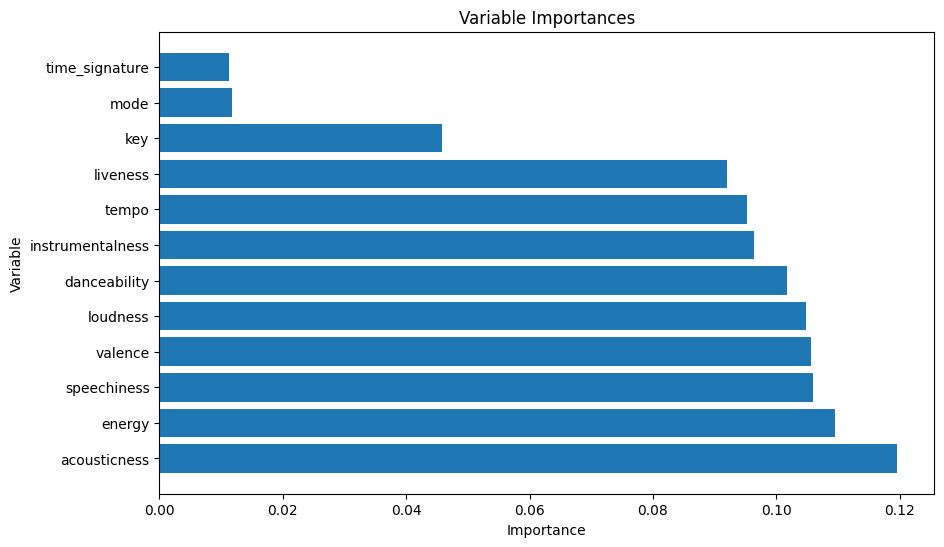

##### Train set: #####
Accuracy: 0.948971738193461
Confusion matrix:
[[30317  3263]
 [   52 31332]]
Precision: 0.9056800115623646
Recall: 0.9983431047667601
F1 Score: 0.9497567407811577

##### Test set: #####
Accuracy: 0.6566309567787219
Confusion matrix:
[[5440 3054]
 [2523 5225]]
Precision: 0.6311148689455248
Recall: 0.6743675787299949
F1 Score: 0.6520247083047358


In [82]:
new_model = RandomForestClassifier(n_estimators=200, max_depth=20, max_features='sqrt', random_state=8743)
new_model.fit(X_train, Y_train)

impurity_importances = pd.DataFrame({ 'variable': X_train.columns, 'importance': new_model.feature_importances_ })
print("\nVariable Importances:")
impurity_importances = impurity_importances.sort_values('importance', ascending=False)
print(impurity_importances)

# Plot the variable importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(impurity_importances['variable'], impurity_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importances')
plt.show()

# Evaluate the model on the Train set
print("##### Train set: #####")
train_predictions = new_model.predict(X_train)
train_accuracy = metrics.accuracy_score(Y_train, train_predictions)
print(f"Accuracy: {train_accuracy}")
train_conf_matrix = metrics.confusion_matrix(Y_train, train_predictions)
print(f"Confusion matrix:\n{train_conf_matrix}")
precision = metrics.precision_score(Y_train, train_predictions)
print(f"Precision: {precision}")
recall = metrics.recall_score(Y_train, train_predictions)
print(f"Recall: {recall}")
f1 = metrics.f1_score(Y_train, train_predictions)
print(f"F1 Score: {f1}")


# Evaluate the model on the Test set
print("\n##### Test set: #####")
test_predictions = new_model.predict(X_test)
test_accuracy = metrics.accuracy_score(Y_test, test_predictions)
print(f"Accuracy: {test_accuracy}")
test_conf_matrix = metrics.confusion_matrix(Y_test, test_predictions)
print(f"Confusion matrix:\n{test_conf_matrix}")
precision = metrics.precision_score(Y_test, test_predictions)
print(f"Precision: {precision}")
recall = metrics.recall_score(Y_test, test_predictions)
print(f"Recall: {recall}")
f1 = metrics.f1_score(Y_test, test_predictions)
print(f"F1 Score: {f1}")

